In [8]:
!unzip alldata.zip

Archive:  alldata.zip
   creating: alldata/
   creating: alldata/data/
   creating: alldata/data/PViTCIFAR-100/
  inflating: alldata/data/PViTCIFAR-100/saved_embeds_step100_seen_2.pkl  
  inflating: alldata/data/PViTCIFAR-100/g_across_layers_lin_probe_acc.png  
  inflating: alldata/data/PViTCIFAR-100/saved_embeds_step278_unseen_1.pkl  
  inflating: alldata/data/PViTCIFAR-100/saved_embeds_step139_seen_2.pkl  
  inflating: alldata/data/PViTCIFAR-100/saved_embeds_step278_seen_0.pkl  
  inflating: alldata/data/PViTCIFAR-100/saved_embeds_step400_unseen_1.pkl  
  inflating: alldata/data/PViTCIFAR-100/saved_embeds_step500_unseen_2.pkl  
  inflating: alldata/data/PViTCIFAR-100/saved_embeds_step0_seen_0.pkl  
  inflating: alldata/data/PViTCIFAR-100/saved_embeds_step278_seen_2.pkl  
  inflating: alldata/data/PViTCIFAR-100/saved_embeds_step200_unseen_0.pkl  
  inflating: alldata/data/PViTCIFAR-100/saved_embeds_step0_unseen_2.pkl  
  inflating: alldata/data/PViTCIFAR-100/saved_embeds_step400_seen_

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
from matplotlib import rcParams
import matplotlib.font_manager as fm
from google.colab import files
rcParams['pdf.fonttype'] = 42
rcParams['ps.fonttype'] = 42
datasets = ['Calligraphy','CIFAR-100']


accs = {#'ResNet':{'Calligraphy':[0.04, .602, .835, .903, .909, .942, .952],
         #        'CIFAR-100':[0.01, .677, .87, .905, .91, .911, .911]},
        'ViT':{'Calligraphy':[[0.93,	0.958,	0.9468], [0.9684,	0.9456,	0.96], [0.9692,	0.9684,	0.9672], [0.9824,	0.9824,	0.9808], [0.9852,	0.9816,	0.9868]],
                 'CIFAR-100':[[0.9325,	0.9315,	0.936], [0.95,	0.948,	0.944], [0.9485,	0.9605,	0.9575], [0.959,	0.9645,	0.9535], [0.9635,	0.969,	0.967]]},
        'Swin':{'Calligraphy':[[0.9296,	0.9016,	0.9316], [0.9552,	0.952,	0.9648], [0.9716,	0.9704,	0.97], [0.982,	0.9864,	0.9792], [0.9848,	0.9884,	0.9852]],
                 'CIFAR-100':[[0.89,	0.892,	0.894], [0.9185,	0.897,	0.8935], [0.93,	0.926,	0.925], [0.935,	0.9355,	0.9425], [0.9465,	0.9495,	0.9485]]},
        'PViT':{'Calligraphy':[[0.9196,	0.9084,	0.924], [0.9528,	0.9492,	0.9512], [0.9472,	0.9588,	0.942], [0.9736,	0.9692,	0.974], [0.9796,	0.9776,	0.9832]],
                 'CIFAR-100':[[0.8655,	0.8585,	0.8585], [0.888,	0.892,	0.861], [0.909,	0.8965,	0.9015], [0.9135,	0.9115,	0.905], [0.925,	0.926,	0.9185]]},
        'CvT':{'Calligraphy':[[0.7212,	0.8244,	0.91], [0.95,	0.9248,	0.934], [0.9524,	0.9364,	0.9732], [0.9784,	0.9764,	0.9836], [0.9884,	0.9884,	0.9896]],
                 'CIFAR-100':[[0.862,	0.8525,	0.837], [0.9155,	0.909,	0.9125], [0.922,	0.92,	0.9325], [0.929,	0.935,	0.9415], [0.9465,	0.9515,	0.9515]]},
        'PoolFormer':{'Calligraphy':[[0.8956,	0.9452,	0.9088], [0.9676,	0.9604,	0.9624], [0.9712,	0.9832,	0.976], [0.9836,	0.9808,	0.9892], [0.9848,	0.9864,	0.9896]],
                 'CIFAR-100':[[0.8515,	0.8295,	0.848], [0.883,	0.89,	0.8865], [0.914,	0.9125,	0.912], [0.916,	0.925,	0.928], [0.922,	0.9325,	0.938]]},
        'ConvNeXtV2':{'Calligraphy':[[0.9208,	0.9572,	0.9512], [0.9792,	0.974,	0.9776], [0.9772,	0.9764,	0.9756], [0.9868,	0.9888,	0.9896], [0.99,	0.99,	0.9892]],
                 'CIFAR-100':[[0.923,	0.921,	0.919], [0.93,	0.9255,	0.9265], [0.9485,	0.9355,	0.936], [0.948,	0.941,	0.9445], [0.9485,	0.95,	0.9565]]},
       }

#modelnames = accs.keys()
modelnames = ['ViT', 'PoolFormer', 'PViT', 'CvT', 'ConvNeXtV2', 'Swin']
steps = list(range(100,600,100))

In [ ]:
#!wget https://github.com/CartoDB/cartodb/blob/master/app/assets/fonts/helvetica.ttf
#!wget https://github.com/EverGoebbels/HelveticaNeue/blob/main/HelveticaNeue-Medium.otf
!wget https://github.com/EverGoebbels/HelveticaNeue/blob/main/HelveticaNeue-CondensedMedium.ttf
prop = fm.FontProperties(fname='HelveticaNeue-CondensedMedium.ttf')
plt.rcParams['font.family'] = prop.get_name()

--2024-04-24 13:12:08--  https://github.com/EverGoebbels/HelveticaNeue/blob/main/HelveticaNeue-CondensedMedium.ttf
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘HelveticaNeue-CondensedMedium.ttf.1’

HelveticaNeue-Conde     [ <=>                ] 147.18K  --.-KB/s    in 0.04s   

2024-04-24 13:12:08 (3.85 MB/s) - ‘HelveticaNeue-CondensedMedium.ttf.1’ saved [150716]



RuntimeError: In FT2Font: Can not load face (unknown file format; error code 0x2)

In [ ]:
!zip figs *.pdf
files.download('figs.zip')

updating: acc-gs-plot.pdf (deflated 30%)
updating: accuracies.pdf (deflated 7%)
updating: metrics-fig.pdf (deflated 26%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Accuracies

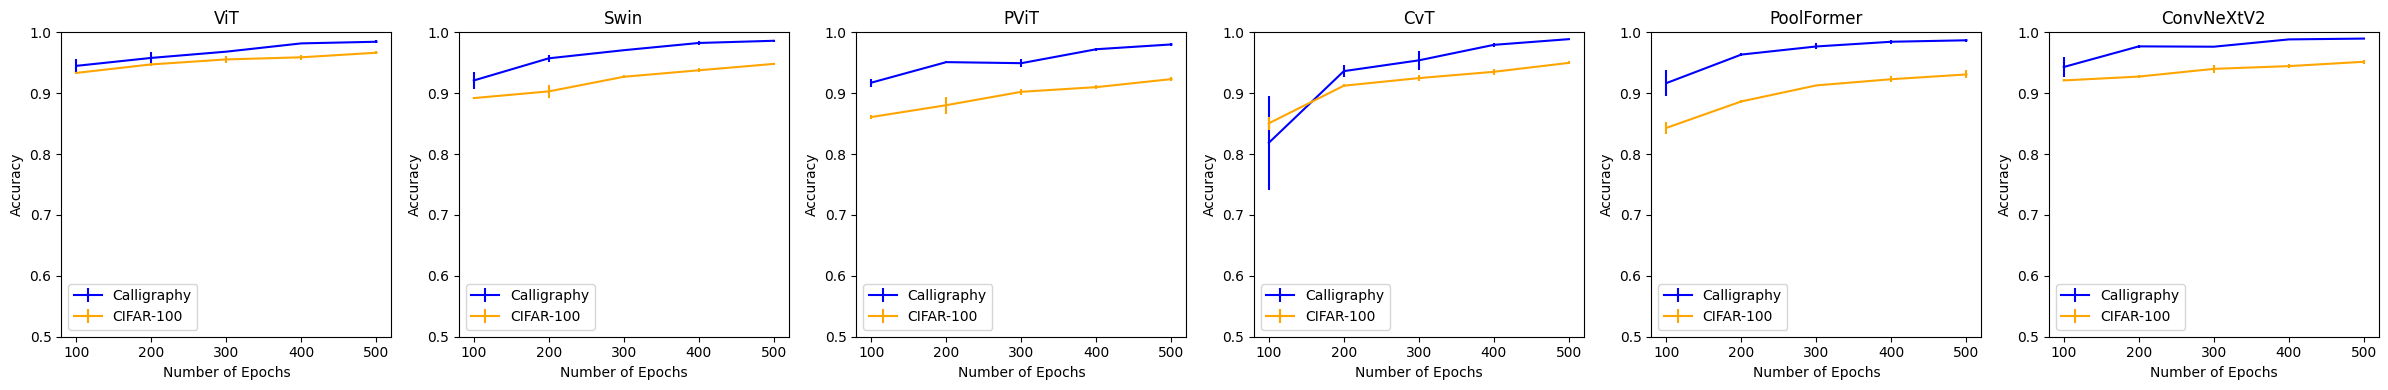

In [10]:
epochs = [100, 200, 300, 400, 500]

nrows = 1
ncols = len(accs.keys())

fig, axs = plt.subplots(nrows, ncols, figsize=(4*ncols, 4*nrows))

for i, model in enumerate(accs):
    ax = axs[i]
    for name, color in zip(['Calligraphy', 'CIFAR-100'], ('blue', 'orange')):
        model_accs = accs[model][name]
        ax.errorbar(epochs, np.mean(model_accs, axis=1), yerr=np.std(model_accs, axis=1), label=name, color=color)

    ax.set_title(model)
    ax.legend()
    ax.set_xlabel('Number of Epochs')
    ax.set_ylabel('Accuracy')
    ax.set_ylim(0.5,1) # may not want, or adjust range

fig.tight_layout()
plt.savefig('accuracies.pdf', transparent=True, bbox_inches='tight')

In [11]:
def embed_fname(model_name, dataset, step, unseen_str, trial_no):
    return f'alldata/data/{model_name}{dataset}/saved_embeds_step{step if step is not None else ""}_{unseen_str}_{trial_no}.pkl'

metric_names = ['NMI', 'NNk1', 'NNk500', 'lin_probe_acc']

def aggregate_trials(model_name, dataset, seen_str, steps=[100,200,300,400,500], trials=[0,1,2]):
    results = {}
    n_trials = len(trials)

    # for each metric, produce an n_steps x n_trials x num_lis tensor
    #for metric in metric_names:
    #    results[metric] = []
    #    for step in steps:
    #        results[metric].append(np.zeros((n_trials, ftmodel.nhs)))

    #print(len(results['NMI']))
    for step_i, step in enumerate(steps):
        for trial_no in range(n_trials):
            with open(embed_fname(model_name, dataset, step, seen_str, trial_no),'rb') as f:
                data = pickle.load(f)
                for metric in metric_names:
                    #print(metric, step, trial_no)
                    if metric not in results:
                        results[metric] = []
                        for step in steps:
                            results[metric].append(np.zeros((n_trials, len(data[metric]))))
                    results[metric][step_i][trial_no] = data[metric]

    #with open(ftmodel.get_embed_pkl_fname(step, 'unseen', 'all'), 'wb') as result_f:
    #   pickle.dump(results, result_f)

    return {metric: np.array(res) for metric, res in results.items()}

def plot_metrics_across_layers(model_name, dataset, trials=list(range(3))):
    #steps = [0,100,200,300,400,500]
    steps = [500]
    emb_results = aggregate_trials(model_name, dataset, seen_str, steps, trials)

    for metric in metric_names:
        for step_i, step in enumerate(steps):
            mean_vals = emb_results[metric][step_i].mean(axis=0)
            stds = emb_results[metric][step_i].std(axis=0)
            plt.errorbar(list(range(len(mean_vals))), mean_vals, yerr=stds, label=f'{step=}')
        plt.ylabel(metric)
        plt.xlabel('Layer')
        plt.title(f'{model_name} on {dataset}')
        plt.legend()
        #plt.savefig(ftmodel.get_dir() + f'g_across_layers_{metric}.png', transparent=True, bbox_inches='tight')
        plt.show()


def plot_across_epochs(model_name, dataset, ax=None, trials=list(range(3))):
    steps = [0,100,200,300,400,500]
    #steps = [500]

    ax.ylabel('generalizability, g')
    ax.xlabel('Layer')
    ax.title(f'{model_name} on {dataset}')
    ax.legend()

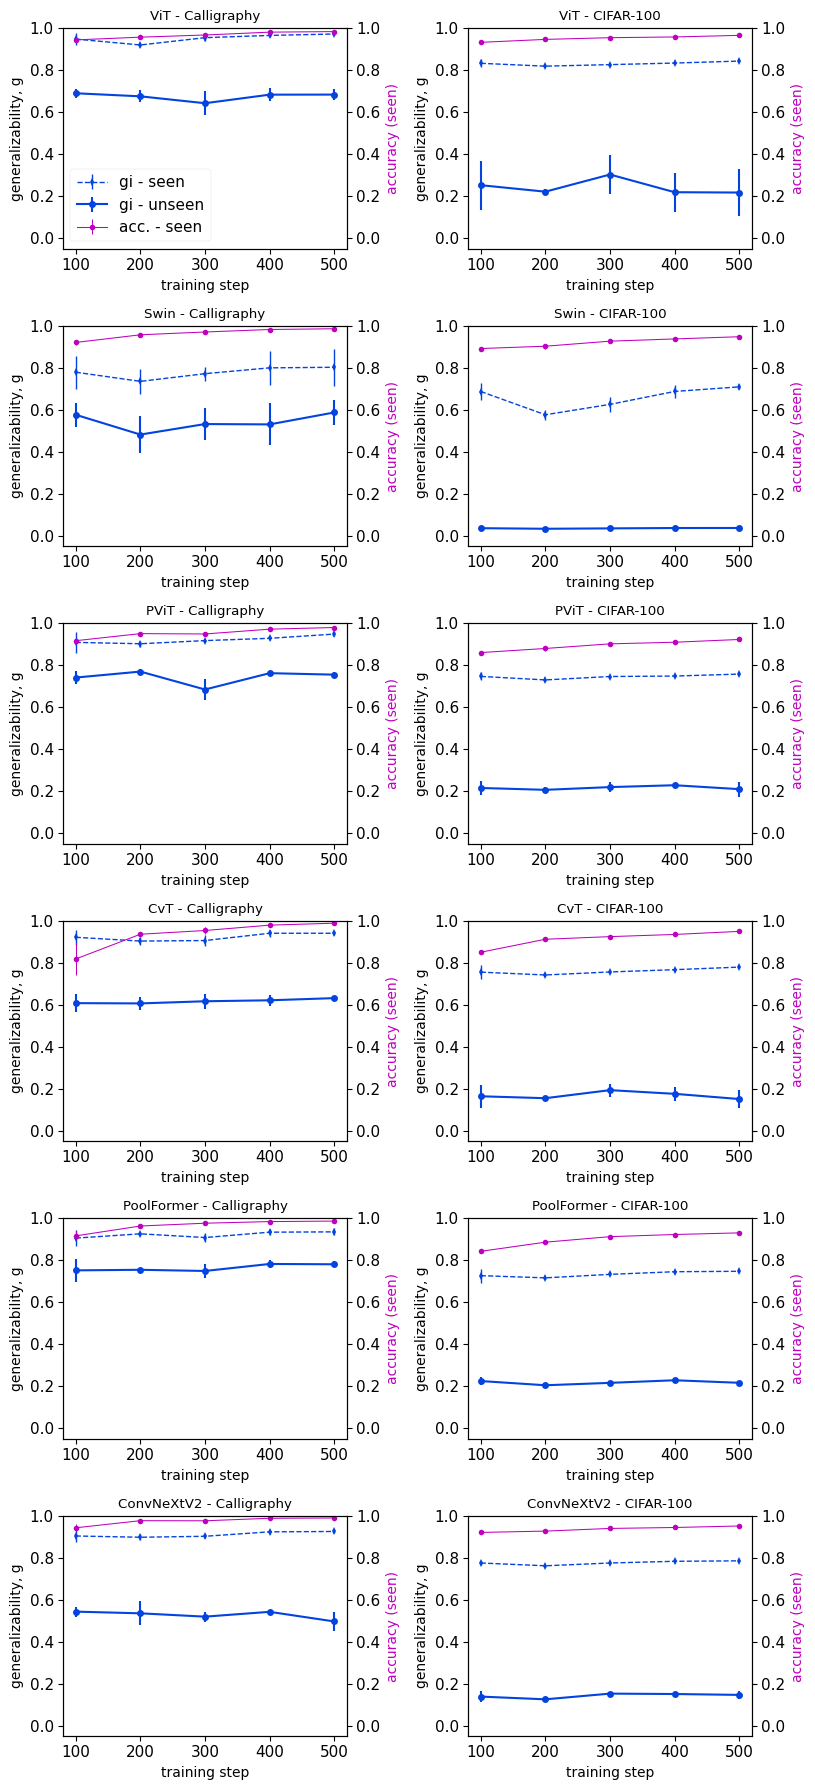

In [ ]:
plt.rcParams["font.family"] = 'sans-serif'

metrics_to_show = ['NMI']
labels_dict = {'NMI':'gi', 'NNk500':'$g_i^{kNN}$', 'NNk1':'$g_i^{NN}$'}
colors_dict = {'NMI':'xkcd:blue', 'NNk500':'xkcd:orange', 'NNk1':'magenta'}
#plot max g_i across steps
LBLSZ = 11
with plt.style.context('seaborn-v0_8-paper'):
    f, axes = plt.subplots(len(modelnames),2,figsize=(2*5.5*.75,len(modelnames)*4*.75))
    for mi,modelname in enumerate(modelnames):
        steps = list(range(100,500+1,100))
        for ax,dataset in zip(axes[mi],datasets):
            for datatype,ls,lw,marker,ms in [('seen','--',1,'d',4),('unseen','-',1.5,'o',5)]:

                for metric in metrics_to_show:
                    emb_results = aggregate_trials(modelname, dataset, datatype, steps)

                    step_i, step = 5, 500
                    vals = emb_results['NMI'][:,:,emb_results['NMI'].mean(axis=1).argmax(axis=1)][:,:,0]
                    mean_vals = vals.mean(axis=1)
                    stds = vals.std(axis=1)
                    ax.errorbar(list(range(len(mean_vals))), mean_vals, yerr=stds, lw=lw, ls=ls, marker=marker, markersize=ms, color=colors_dict[metric], label=f'{labels_dict[metric]} - {datatype}')
            if dataset in accs[modelname]:
                ax_ = ax.twinx()
                accuracies = accs[modelname][dataset][:len(steps)]
                ax.errorbar(list(range(len(mean_vals))), np.mean(accuracies,  axis=1), yerr=np.std(accuracies, axis=1), fmt='mo-', lw=.75, markersize=4, label='acc. - seen')
                ax_.set_ylabel('accuracy (seen)',color='m',size=10)
                ax_.tick_params(axis='y', which='major', labelsize=LBLSZ, pad=3)
                ax_.set(ylim=(-0.05,1))
            ax.set(xticks=range(len(mean_vals)),
                   xticklabels=range(100,len(mean_vals)*100+100,100),
                   ylim=(-0.05,1))
            ax.set_xlabel('training step',size=10)
            ax.set_ylabel('generalizability, g',size=10)
            ax.set_title(f'{modelname} - {dataset}')
            ax.tick_params(axis='both', which='major', labelsize=LBLSZ, pad=3)
            if mi == 0 and dataset=='Calligraphy':
                ax.legend(**{'fontsize':LBLSZ})
            #ax.legend(**{'fontsize':LBLSZ})
            #ax_.legend(loc='upper left', **{'fontsize':8})
    f.tight_layout()
    plt.savefig('acc-gs-plot.pdf', transparent=True, bbox_inches='tight')
    plt.show()

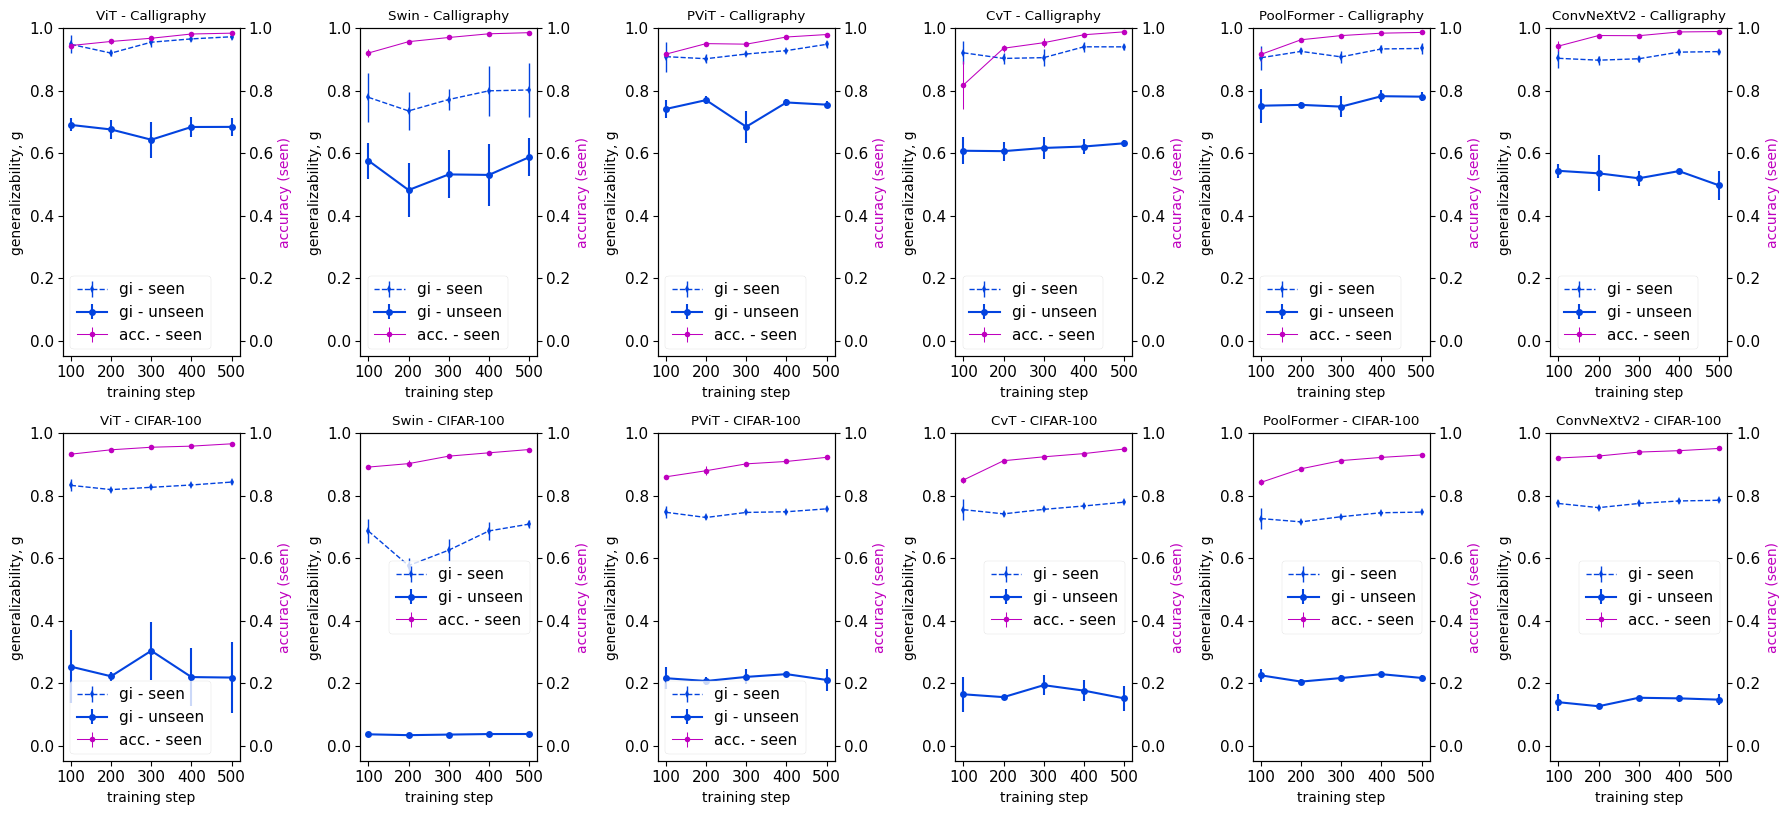

In [ ]:
plt.rcParams["font.family"] = 'sans-serif'

metrics_to_show = ['NMI']
labels_dict = {'NMI':'gi', 'NNk500':'$g_i^{kNN}$', 'NNk1':'$g_i^{NN}$'}
colors_dict = {'NMI':'xkcd:blue', 'NNk500':'xkcd:orange', 'NNk1':'magenta'}
#plot max g_i across steps
LBLSZ = 11

nr = 4
nc = 3

with plt.style.context('seaborn-v0_8-paper'):
    f, axes = plt.subplots(len(datasets),len(modelnames),figsize=(len(modelnames)*4*.75, 2*5.5*.75))
    steps = list(range(100,500+1,100))
    for di,dataset in enumerate(datasets):
        for ax,modelname in zip(axes[di],modelnames):

            for datatype,ls,lw,marker,ms in [('seen','--',1,'d',4),('unseen','-',1.5,'o',5)]:

                for metric in metrics_to_show:
                    emb_results = aggregate_trials(modelname, dataset, datatype, steps)

                    step_i, step = 5, 500
                    vals = emb_results['NMI'][:,:,emb_results['NMI'].mean(axis=1).argmax(axis=1)][:,:,0]
                    mean_vals = vals.mean(axis=1)
                    stds = vals.std(axis=1)
                    ax.errorbar(list(range(len(mean_vals))), mean_vals, yerr=stds, lw=lw, ls=ls, marker=marker, markersize=ms, color=colors_dict[metric], label=f'{labels_dict[metric]} - {datatype}')
            if dataset in accs[modelname]:
                ax_ = ax.twinx()
                accuracies = accs[modelname][dataset][:len(steps)]
                ax.errorbar(list(range(len(mean_vals))), np.mean(accuracies,  axis=1), yerr=np.std(accuracies, axis=1), fmt='mo-', lw=.75, markersize=4, label='acc. - seen')
                ax_.set_ylabel('accuracy (seen)',color='m',size=10)
                ax_.tick_params(axis='y', which='major', labelsize=LBLSZ, pad=3)
                ax_.set(ylim=(-0.05,1))
            ax.set(xticks=range(len(mean_vals)),
                   xticklabels=range(100,len(mean_vals)*100+100,100),
                   ylim=(-0.05,1))
            ax.set_xlabel('training step',size=10)
            ax.set_ylabel('generalizability, g',size=10)
            ax.set_title(f'{modelname} - {dataset}')
            ax.tick_params(axis='both', which='major', labelsize=LBLSZ, pad=3)
            ax.legend(**{'fontsize':LBLSZ})
            #ax_.legend(loc='upper left', **{'fontsize':8})
    f.tight_layout()
    plt.savefig('acc-gs-plot.pdf', transparent=True, bbox_inches='tight')
    plt.show()

In [ ]:
emb_results.keys()

dict_keys(['NMI', 'NNk1', 'NNk500', 'lin_probe_acc'])

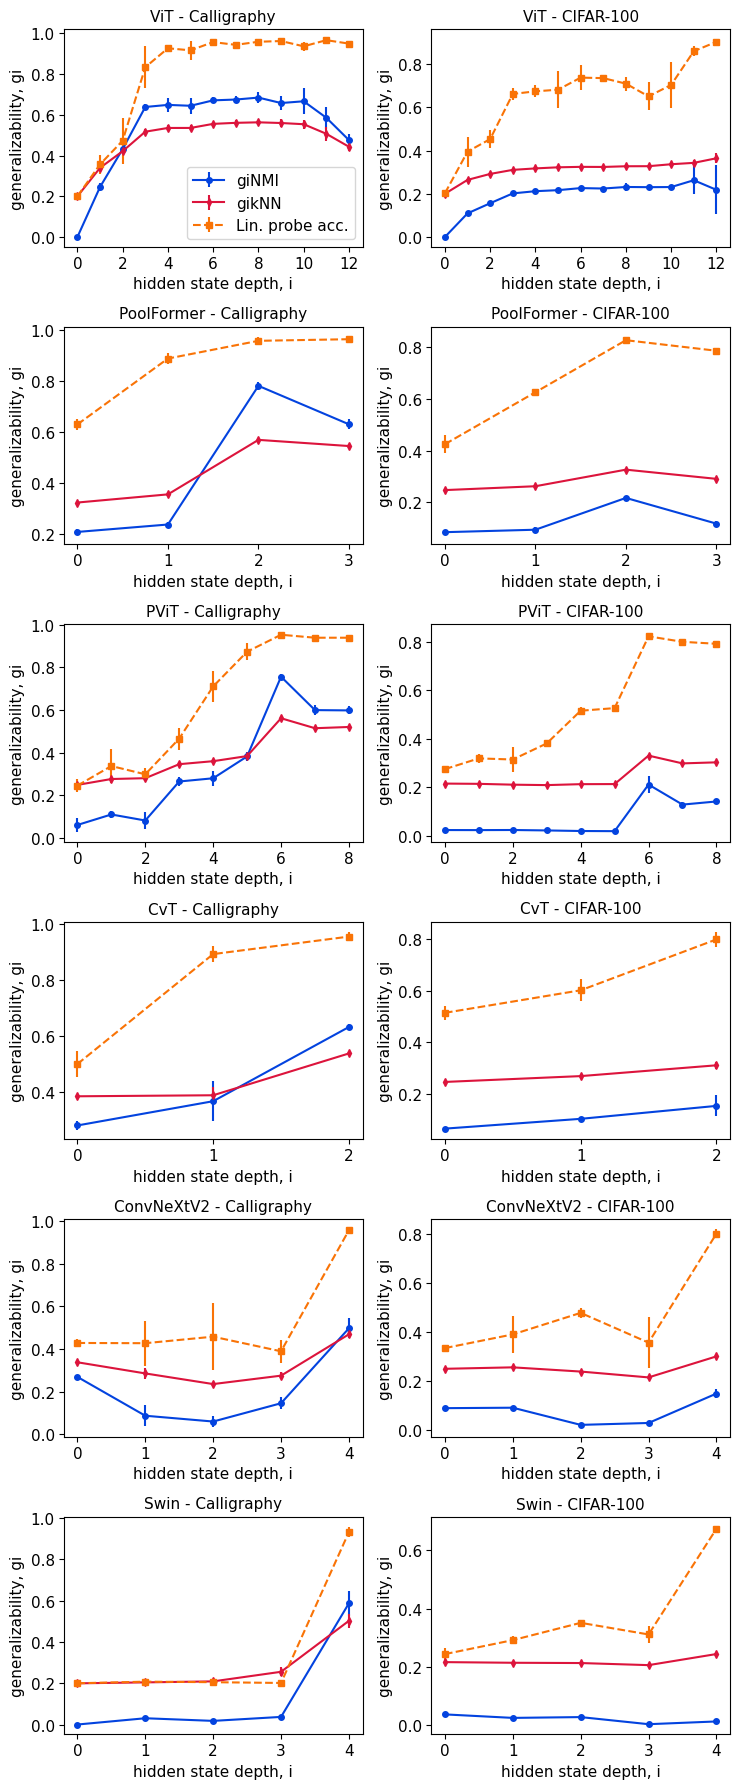

In [15]:
# COMPARING NMI and kNN across layers at end of fine-tuning (last step)
LBLSZ = 11

f, axes = plt.subplots(len(modelnames),2,figsize=(10*.75,len(modelnames)*4*.75))
for mi,modelname in enumerate(modelnames):

    metrics_to_show = ['NMI','NNk500', 'lin_probe_acc']
    datatype = 'unseen'
    step_i = len(steps)-1 #last step
    labels_dict = {'NMI':'giNMI', 'NNk500':'gikNN', 'NNk1':'$g_i^{NN}$', 'lin_probe_acc':'Lin. probe acc.'}
    colors_dict = {'NMI':'xkcd:blue', 'NNk1':'xkcd:orange', 'NNk500':'crimson', 'lin_probe_acc':'xkcd:orange'}
    markers_dict = {'NMI':'o', 'NNk500':'d', 'lin_probe_acc':'s'}
    line_styles = {'NMI':'-', 'NNk500':'-', 'lin_probe_acc':'--'}

    for ax, dataset in zip(axes[mi],datasets):
        emb_results = aggregate_trials(modelname, dataset, datatype)

        for metric in metrics_to_show:
            vals = emb_results[metric][-1,:,:]
            ax.errorbar(list(range(len(vals[0]))), vals.mean(axis=0), vals.std(axis=0), ls=line_styles[metric], lw=1.5, marker=markers_dict[metric],
                    markersize=4, color=colors_dict[metric], label=labels_dict[metric])

        if modelname == 'ViT':
            ax.set_xticks(range(0,13,2))
        elif modelname == 'PViT':
            ax.set_xticks(range(0,9,2))
        else:
            ax.set(xticks=range(len(vals[0])))
        ax.set_xlabel('hidden state depth, i',size=LBLSZ)
        ax.set_ylabel('generalizability, gi',size=LBLSZ)
        ax.set_title(f'{modelname} - {dataset}',size=LBLSZ)
        ax.tick_params(axis='both', which='major', labelsize=LBLSZ, pad=3)
        if mi == 0 and dataset=='Calligraphy':
            ax.legend(**{'fontsize':LBLSZ})

f.tight_layout()
plt.savefig('metrics-fig.pdf', transparent=True, bbox_inches='tight')
plt.show()

# Table data

In [ ]:
for model in accs:
    for dataset in accs[model]:
        if dataset == 'Calligraphy':
            print(f'{round(np.mean(accs[model][dataset][4]), 2)} & ', end='')
print()
for model in accs:
    for dataset in accs[model]:
        if dataset == 'CIFAR-100':
            print(f'{round(np.mean(accs[model][dataset][4]), 2)} & ', end='')

0.98 & 0.99 & 0.98 & 0.99 & 0.99 & 0.99 & 
0.97 & 0.95 & 0.92 & 0.95 & 0.93 & 0.95 & 

In [ ]:
metrics = ['NMI', 'NNk500', 'lin_probe_acc']

for dataset in datasets:
        print()
        for metric in metrics:
            for seen_str in ('seen', 'unseen'):
                print(dataset, seen_str, metric)
                for modelname in modelnames:;

                    emb_results = aggregate_trials(modelname, dataset, seen_str)

                    print(f' & {round(emb_results[metric][-1,:,:].mean(axis=0).max(),2)}', end = '')
                print()


Calligraphy seen NMI
 & 0.97 & 0.8 & 0.95 & 0.94 & 0.94 & 0.93
Calligraphy unseen NMI
 & 0.68 & 0.59 & 0.76 & 0.63 & 0.78 & 0.5
Calligraphy seen NNk500
 & 0.38 & 0.34 & 0.38 & 0.37 & 0.37 & 0.37
Calligraphy unseen NNk500
 & 0.56 & 0.5 & 0.56 & 0.54 & 0.57 & 0.47
Calligraphy seen lin_probe_acc
 & 0.99 & 0.95 & 0.98 & 0.99 & 0.98 & 0.99
Calligraphy unseen lin_probe_acc
 & 0.97 & 0.93 & 0.95 & 0.96 & 0.96 & 0.96

CIFAR-100 seen NMI
 & 0.84 & 0.71 & 0.76 & 0.78 & 0.75 & 0.79
CIFAR-100 unseen NMI
 & 0.26 & 0.04 & 0.21 & 0.15 & 0.22 & 0.15
CIFAR-100 seen NNk500
 & 0.2 & 0.13 & 0.2 & 0.2 & 0.19 & 0.2
CIFAR-100 unseen NNk500
 & 0.36 & 0.24 & 0.33 & 0.31 & 0.33 & 0.3
CIFAR-100 seen lin_probe_acc
 & 0.96 & 0.92 & 0.92 & 0.95 & 0.92 & 0.94
CIFAR-100 unseen lin_probe_acc
 & 0.9 & 0.67 & 0.82 & 0.8 & 0.83 & 0.8


In [ ]:
modelnames

dict_keys(['ViT', 'Swin', 'PViT', 'CvT', 'PoolFormer', 'ConvNeXtV2'])

# OLD

In [ ]:
modelnames = ['ViT', 'Swin', 'PViT', 'PoolFormer', 'CvT', 'ConvNextV2'] # ResNet

#isCNN = True
metrics = ['NMI', 'NNk1', 'NNk500']

data_arrays = {modelname:{} for modelname in modelnames}
for modelname in modelnames:
    steps = list(range(0,500+1,100)) if modelname == 'ResNet' else list(range(0,400+1,100))
    for dataset in datasets:
        data_arrays[modelname][dataset] = {}
        for datatype in ['seen','unseen']:
            data_arrays[modelname][dataset][datatype] = {}
            for step in steps:

                with open(f'{dataset}_seen_unseen_data/{modelname}{dataset}/saved_embeds_step{step}_{datatype}.pkl','rb') as f:
                    data = pickle.load(f)


                methd = list(data.keys())[0]


                for metric in metrics:
                    layer_data = np.array([data[methd][layer_i][metric] for layer_i in data[methd]])
                    if step == 0:
                        data_arrays[modelname][dataset][datatype][metric] = layer_data[None,:]
                    else:
                        #concatenate
                        data_arrays[modelname][dataset][datatype][metric] = np.concatenate([data_arrays[modelname][dataset][datatype][metric], layer_data[None,:]],axis=0)



1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


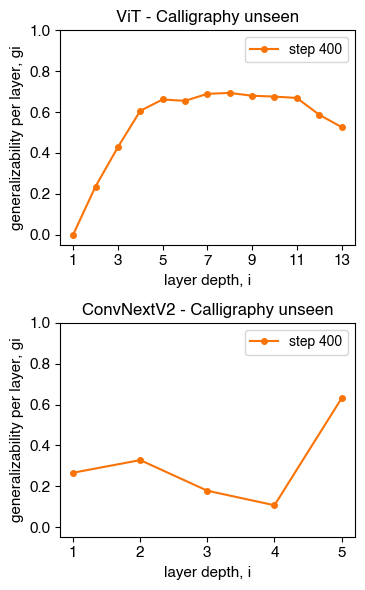

In [ ]:
# COMPARING NMI and kNN across layers at end of fine-tuning (last step)

f, axes = plt.subplots(2,1,figsize=(5*.75,8*.75))
for ax,modelname in zip(axes,['ViT','ConvNextV2']):
    metrics_to_show = ['NMI']
    datatype = 'unseen'
    step_i = len(steps)-1 #last step
    labels_dict = {'NMI':'step 400', 'NNk500':'$g_i^{kNN}$', 'NNk1':'$g_i^{NN}$'}
    colors_dict = {'NMI':'xkcd:orange', 'NNk1':'xkcd:orange', 'NNk500':'magenta'}




    dataset = 'Calligraphy'

    for metric in metrics_to_show:
        ax.plot(data_arrays[modelname][dataset][datatype][metric][step_i], lw=1.5, marker='o', markersize=4, color=colors_dict[metric], label=labels_dict[metric])
    ax.set(xticks=range(data_arrays[modelname][dataset][datatype][metric].shape[1]))
    ax.set_xlabel('layer depth, i', size=LBLSZ)
    ax.set_ylabel("generalizability per layer, gi", size=LBLSZ)
    if modelname == 'ViT':
        ax.set_xticks(range(0,13,2))
        #ax.set_xticklabels(range(1,14,2))
#     else:
#         ax.set_xticklabels(range(1,6))
    ax.set_ylim(-.05,1)
    ax.set_title(f'{modelname} - {dataset} {datatype}')
    ax.tick_params(axis='both', which='major', labelsize=LBLSZ, pad=3)
    ax.legend(**{'fontsize':LBLSZ})

    ax.legend()

f.tight_layout()
plt.savefig('layer-depths-fig1.pdf', transparent=True, bbox_inches='tight')
plt.show()

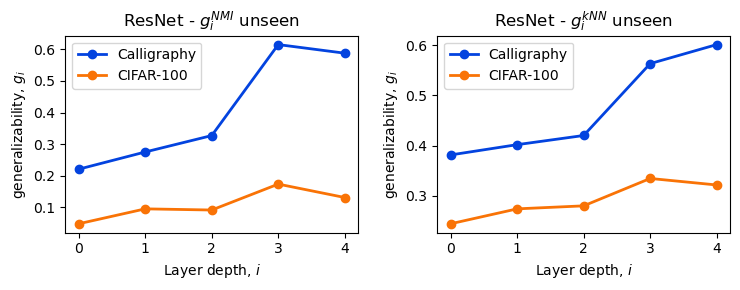

In [ ]:
#plot data across layers for last step
metrics_to_show = ['NMI','NNk500']
datatype = 'unseen'
step_i = len(steps)-1 #last step
labels_dict = {'NMI':'$g_i^{NMI}$', 'NNk500':'$g_i^{kNN}$'}
colors_dict = {'Calligraphy':'xkcd:blue', 'CIFAR-100':'xkcd:orange'}



f, axes = plt.subplots(1,2,figsize=(10*.75,4*.75))
for ax, metric in zip(axes,metrics_to_show):
    for dataset in datasets:
        ax.plot(data_arrays[dataset][datatype][metric][step_i], lw=2, marker='o', markersize=6,
                color=colors_dict[dataset], label=dataset)
    ax.set(xticks=range(data_arrays[dataset][datatype][metric].shape[1]))
    ax.set_xlabel('Layer depth, $i$')
    ax.set_ylabel('generalizability, $g_i$')
    ax.set_title(f'{modelname} - {labels_dict[metric]} {datatype}')

    ax.legend()
f.tight_layout()
plt.show()

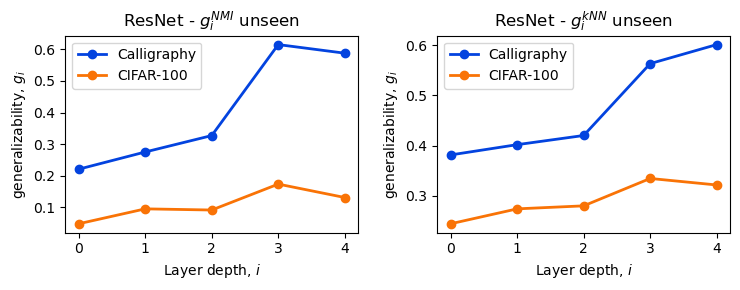

In [ ]:
#plot data across layers for last step
metrics_to_show = ['NMI','NNk500']
datatype = 'unseen'
step_i = len(steps)-1 #last step
labels_dict = {'NMI':'$g_i^{NMI}$', 'NNk500':'$g_i^{kNN}$'}
colors_dict = {'Calligraphy':'xkcd:blue', 'CIFAR-100':'xkcd:orange'}



f, axes = plt.subplots(1,2,figsize=(10*.75,4*.75))
for ax, metric in zip(axes,metrics_to_show):
    for dataset in datasets:
        ax.plot(data_arrays[dataset][datatype][metric][step_i], lw=2, marker='o', markersize=6,
                color=colors_dict[dataset], label=dataset)
    ax.set(xticks=range(data_arrays[dataset][datatype][metric].shape[1]))
    ax.set_xlabel('Layer depth, $i$')
    ax.set_ylabel('generalizability, $g_i$')
    ax.set_title(f'{modelname} - {labels_dict[metric]} {datatype}')

    ax.legend()
f.tight_layout()
plt.show()

1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


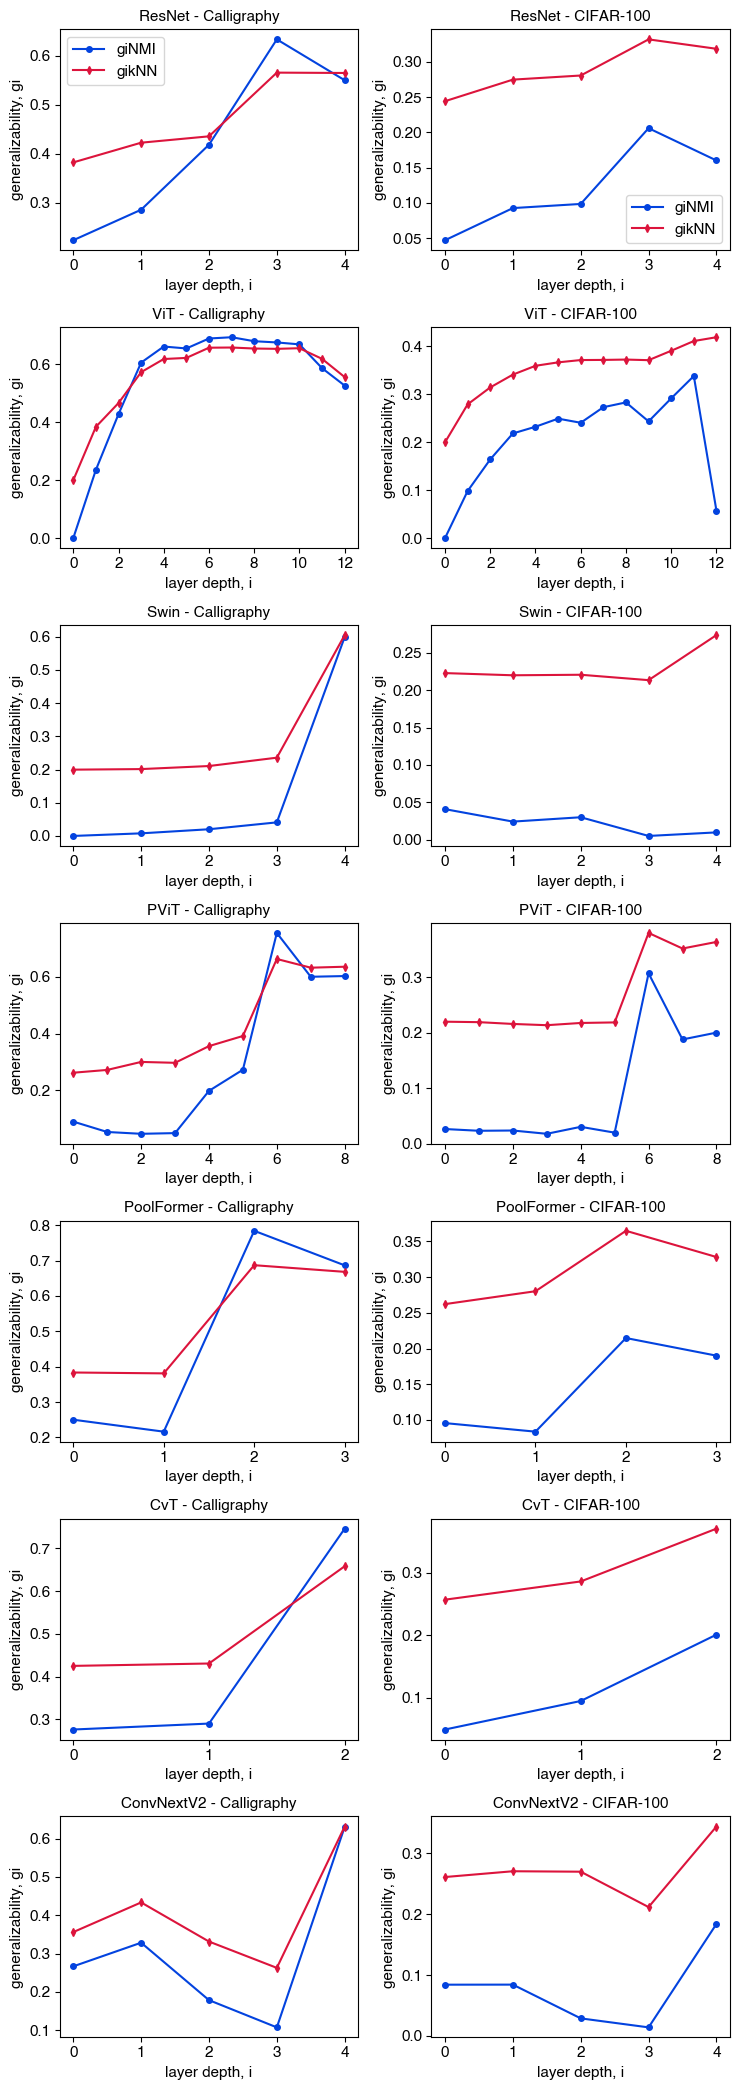

In [ ]:
# COMPARING NMI and kNN across layers at end of fine-tuning (last step)

f, axes = plt.subplots(len(modelnames),2,figsize=(10*.75,len(modelnames)*4*.75))
for mi,modelname in enumerate(modelnames):


    metrics_to_show = ['NMI','NNk500']
    datatype = 'unseen'
    step_i = len(steps)-1 #last step
    labels_dict = {'NMI':'giNMI', 'NNk500':'gikNN', 'NNk1':'$g_i^{NN}$'}
    colors_dict = {'NMI':'xkcd:blue', 'NNk1':'xkcd:orange', 'NNk500':'crimson'}
    markers_dict = {'NMI':'o', 'NNk500':'d'}

    for ax, dataset in zip(axes[mi],datasets):

        for metric in metrics_to_show:
            ax.plot(data_arrays[modelname][dataset][datatype][metric][step_i], lw=1.5, marker=markers_dict[metric],
                    markersize=4, color=colors_dict[metric], label=labels_dict[metric])

        if modelname == 'ViT':
            ax.set_xticks(range(0,13,2))
        elif modelname == 'PViT':
            ax.set_xticks(range(0,9,2))
        else:
            ax.set(xticks=range(data_arrays[modelname][dataset][datatype][metric].shape[1]))
        ax.set_xlabel('layer depth, i',size=LBLSZ)
        ax.set_ylabel('generalizability, gi',size=LBLSZ)
        ax.set_title(f'{modelname} - {dataset}',size=LBLSZ)
        ax.tick_params(axis='both', which='major', labelsize=LBLSZ, pad=3)
        if mi == 0:
            ax.legend(**{'fontsize':LBLSZ})
f.tight_layout()
plt.savefig('metrics-fig.pdf', transparent=True, bbox_inches='tight')
plt.show()

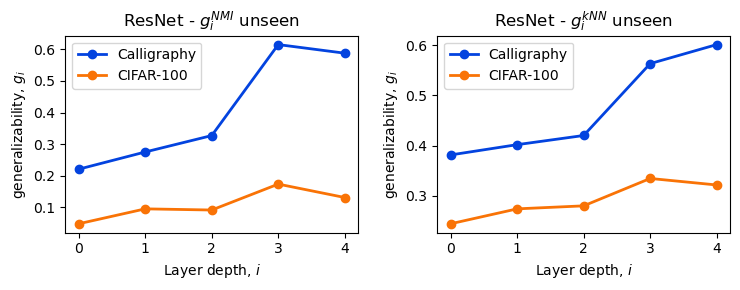

In [ ]:
#plot data across layers for last step
metrics_to_show = ['NMI','NNk500']
datatype = 'unseen'
step_i = len(steps)-1 #last step
labels_dict = {'NMI':'$g_i^{NMI}$', 'NNk500':'$g_i^{kNN}$'}
colors_dict = {'Calligraphy':'xkcd:blue', 'CIFAR-100':'xkcd:orange'}



f, axes = plt.subplots(1,2,figsize=(10*.75,4*.75))
for ax, metric in zip(axes,metrics_to_show):
    for dataset in datasets:
        ax.plot(data_arrays[dataset][datatype][metric][step_i], lw=2, marker='o', markersize=6,
                color=colors_dict[dataset], label=dataset)
    ax.set(xticks=range(data_arrays[dataset][datatype][metric].shape[1]))
    ax.set_xlabel('Layer depth, $i$')
    ax.set_ylabel('generalizability, $g_i$')
    ax.set_title(f'{modelname} - {labels_dict[metric]} {datatype}')

    ax.legend()
f.tight_layout()
plt.show()

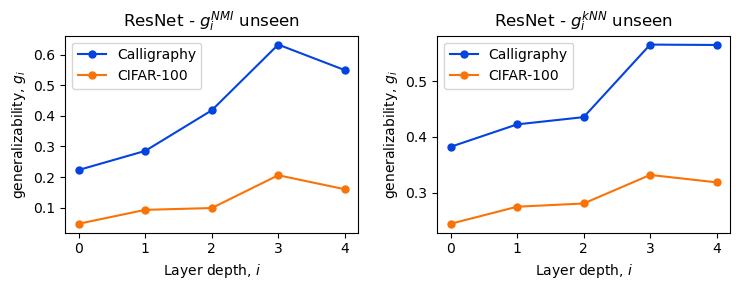

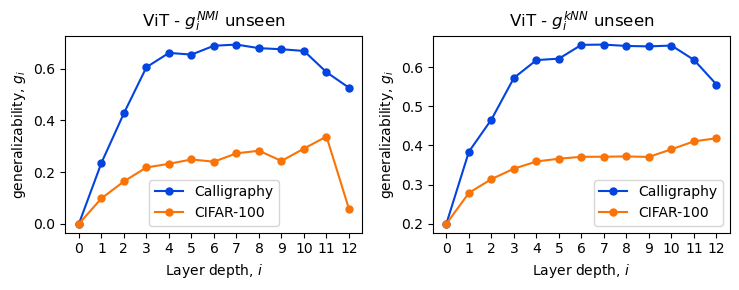

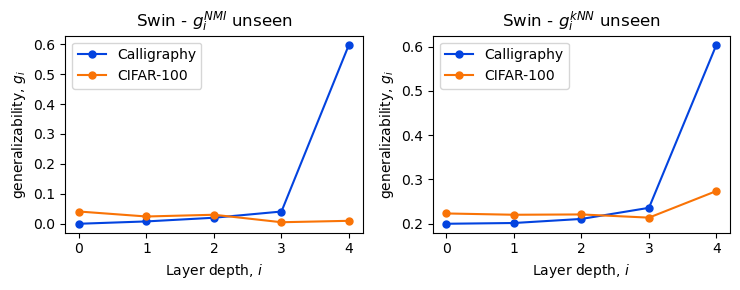

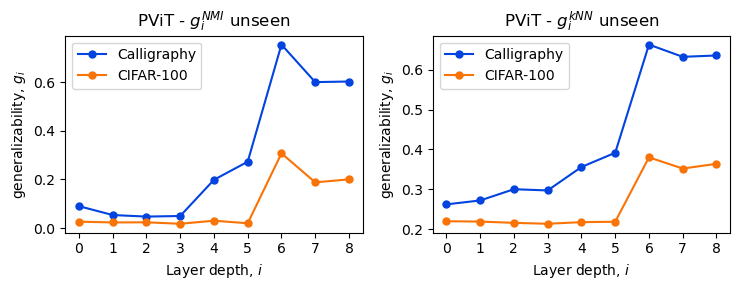

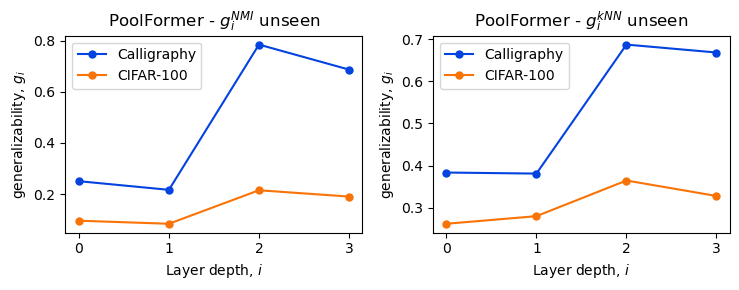

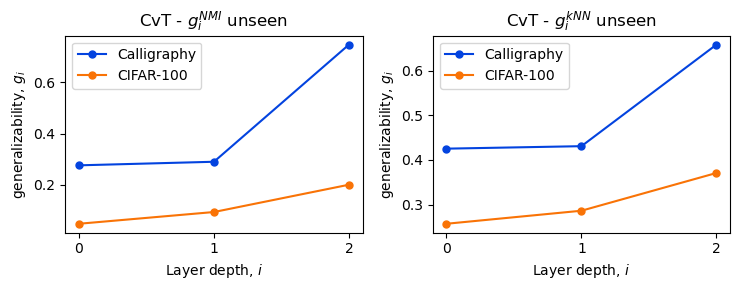

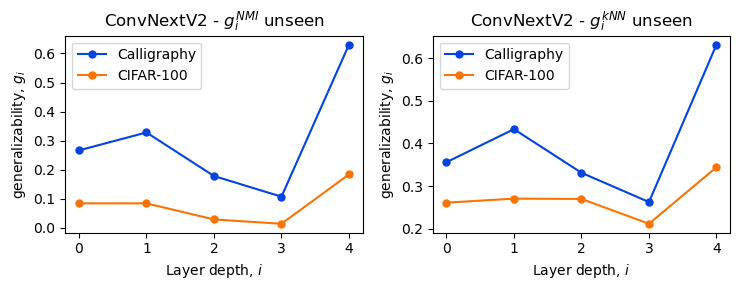

In [ ]:
#  COMPARE NMI across layers for the two datasets
metrics_to_show = ['NMI','NNk500']
datatype = 'unseen'
step_i = len(steps)-1 #last step
labels_dict = {'NMI':'$g_i^{NMI}$', 'NNk500':'$g_i^{kNN}$'}
colors_dict = {'Calligraphy':'xkcd:blue', 'CIFAR-100':'xkcd:orange'}
for modelname in modelnames:
    f, axes = plt.subplots(1,2,figsize=(10*.75,4*.75))
    for ax, metric in zip(axes,metrics_to_show):
        for dataset in datasets:
            ax.plot(data_arrays[modelname][dataset][datatype][metric][step_i], lw=1.5, marker='o', markersize=5,
                    color=colors_dict[dataset], label=dataset)
        ax.set(xticks=range(data_arrays[modelname][dataset][datatype][metric].shape[1]))
        ax.set_xlabel('Layer depth, $i$')
        ax.set_ylabel('generalizability, $g_i$')
        ax.set_title(f'{modelname} - {labels_dict[metric]} {datatype}')

        ax.legend()
    f.tight_layout()
    plt.show()

1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


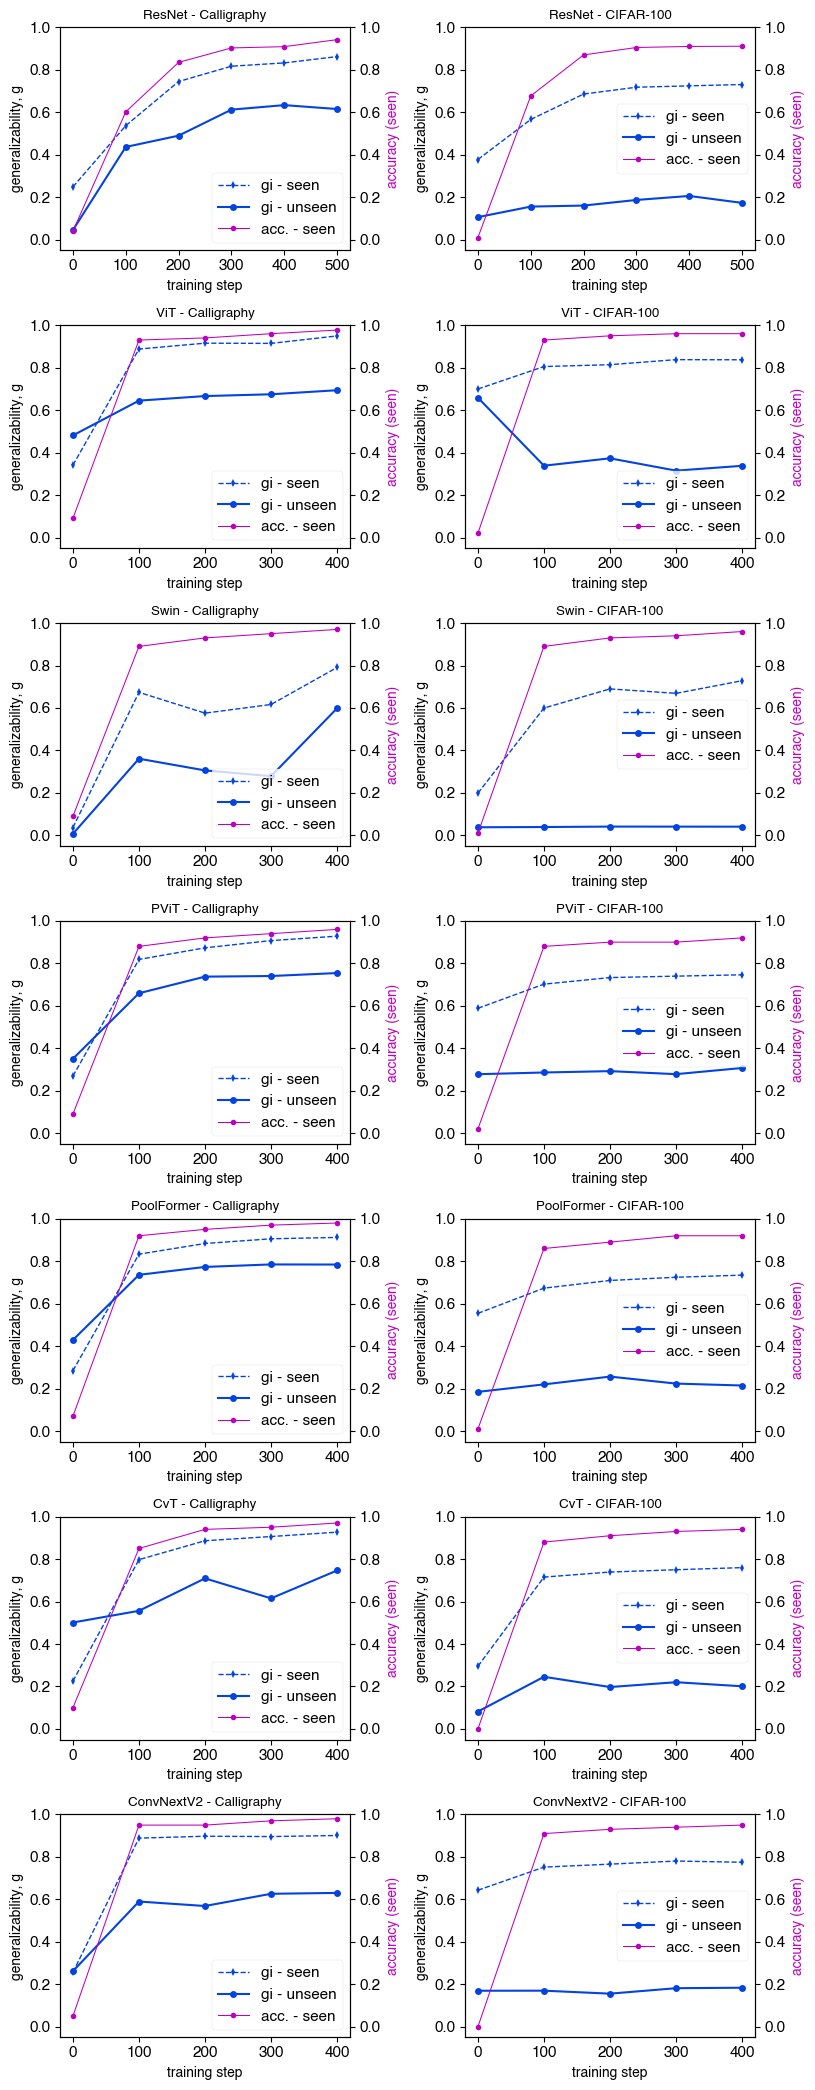

In [ ]:

plt.rcParams["font.family"] = "helvetica"

metrics_to_show = ['NMI']
labels_dict = {'NMI':'gi', 'NNk500':'$g_i^{kNN}$', 'NNk1':'$g_i^{NN}$'}
colors_dict = {'NMI':'xkcd:blue', 'NNk500':'xkcd:orange', 'NNk1':'magenta'}
#plot max g_i across steps
LBLSZ = 11
with plt.style.context('seaborn-v0_8-paper'):
    f, axes = plt.subplots(len(modelnames),2,figsize=(2*5.5*.75,len(modelnames)*4*.75))
    for mi,modelname in enumerate(modelnames):
        steps = list(range(0,500+1,100)) if modelname == 'ResNet' else list(range(0,400+1,100))

        for ax,dataset in zip(axes[mi],datasets):


            for datatype,ls,lw,marker,ms in [('seen','--',1,'d',4),('unseen','-',1.5,'o',5)]:

                for metric in metrics_to_show:
                    vals = [max(data_arrays[modelname][dataset][datatype][metric][ii]) for ii in range(len(steps))]

                    ax.plot(vals, lw=lw, ls=ls, marker=marker, markersize=ms, color=colors_dict[metric], label=f'{labels_dict[metric]} - {datatype}')
            if dataset in accs[modelname]:
                ax_ = ax.twinx()
                ax.plot(accs[modelname][dataset][:len(steps)],'mo-', lw=.75, markersize=4, label='acc. - seen')
                ax_.set_ylabel('accuracy (seen)',color='m',size=10)
                ax_.tick_params(axis='y', which='major', labelsize=LBLSZ, pad=3)
        #         ax_.tick_params(axis='y', colors='red')
        #         ax_.set_yticks(ax.get_yticks(),ticklabelcolor='r')
                ax_.set(ylim=(-0.05,1))
            ax.set(xticks=range(data_arrays[modelname][dataset][datatype][metric].shape[0]),
                   xticklabels=range(0,data_arrays[modelname][dataset][datatype][metric].shape[0]*100,100),
                   ylim=(-0.05,1))
            ax.set_xlabel('training step',size=10)
            ax.set_ylabel('generalizability, g',size=10)
            ax.set_title(f'{modelname} - {dataset}')
            ax.tick_params(axis='both', which='major', labelsize=LBLSZ, pad=3)
            ax.legend(**{'fontsize':LBLSZ})
            #ax_.legend(loc='upper left', **{'fontsize':8})
    f.tight_layout()
    plt.savefig('acc-gs-plot.pdf', transparent=True, bbox_inches='tight')
    plt.show()

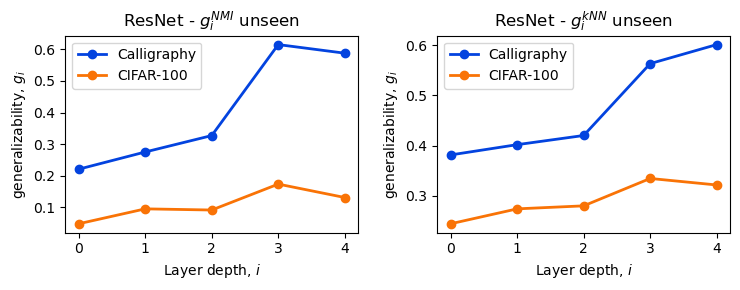

In [ ]:
#plot data across layers for last step
metrics_to_show = ['NMI','NNk500']
datatype = 'unseen'
step_i = len(steps)-1 #last step
labels_dict = {'NMI':'$g_i^{NMI}$', 'NNk500':'$g_i^{kNN}$'}
colors_dict = {'Calligraphy':'xkcd:blue', 'CIFAR-100':'xkcd:orange'}



f, axes = plt.subplots(1,2,figsize=(10*.75,4*.75))
for ax, metric in zip(axes,metrics_to_show):
    for dataset in datasets:
        ax.plot(data_arrays[dataset][datatype][metric][step_i], lw=2, marker='o', markersize=6,
                color=colors_dict[dataset], label=dataset)
    ax.set(xticks=range(data_arrays[dataset][datatype][metric].shape[1]))
    ax.set_xlabel('Layer depth, $i$')
    ax.set_ylabel('generalizability, $g_i$')
    ax.set_title(f'{modelname} - {labels_dict[metric]} {datatype}')

    ax.legend()
f.tight_layout()
plt.show()

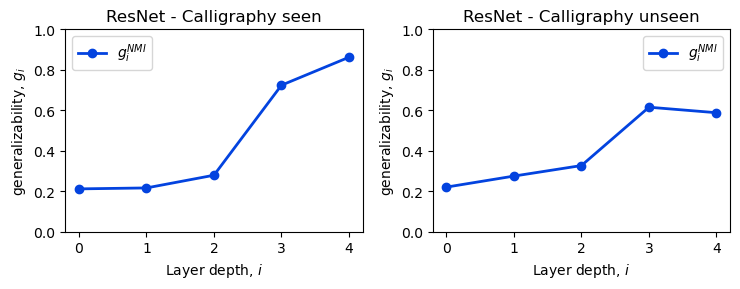

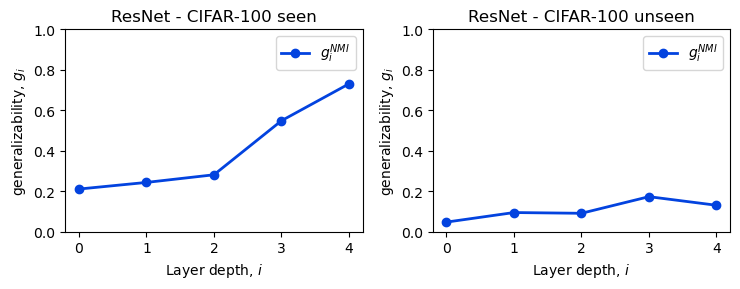

In [ ]:
#plot data across layers for last step
metrics_to_show = ['NMI']#,'NNk500']
for dataset in datasets:
    f, axes = plt.subplots(1,2,figsize=(10*.75,4*.75))
    step_i = len(steps)-1 #last step
    labels_dict = {'NMI':'$g_i^{NMI}$', 'NNk500':'$g_i^{kNN}$', 'NNk1':'$g_i^{NN}$'}
    colors_dict = {'NMI':'xkcd:blue', 'NNk500':'xkcd:orange', 'NNk1':'magenta'}

    for ax, datatype in zip(axes,['seen','unseen']):

        for metric in metrics_to_show:
            ax.plot(data_arrays[dataset][datatype][metric][step_i], lw=2, marker='o', markersize=6, color=colors_dict[metric], label=labels_dict[metric])
        ax.set(xticks=range(data_arrays[dataset][datatype][metric].shape[1]), ylim=(0,1))
        ax.set_xlabel('Layer depth, $i$')
        ax.set_ylabel('generalizability, $g_i$')
        ax.set_title(f'{modelname} - {dataset} {datatype}')

        ax.legend()
    f.tight_layout()
    plt.show()

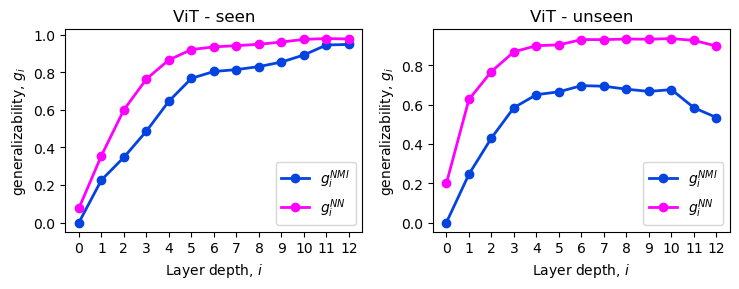

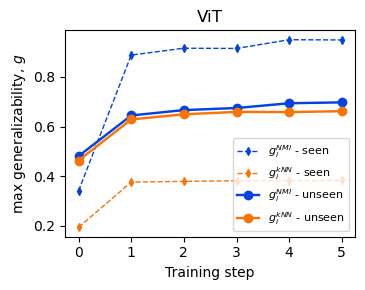

In [ ]:
modelname = 'ViT'
steps = list(range(0,500+1,100))

#isCNN = True
metrics = ['NMI', 'NNk1', 'NNk500']
data_arrays = {}

for datatype in ['seen','unseen']:
    data_arrays[datatype] = {}
    for step in steps:

        with open(f'{folder}/{modelname}Calligraphy/saved_embeds_step{step}_{datatype}.pkl','rb') as f:
            data = pickle.load(f)

        methd = list(data.keys())[0]


        for metric in metrics:
            layer_data = np.array([data[methd][layer_i][metric] for layer_i in data[methd]])
            if step == 0:
                data_arrays[datatype][metric] = layer_data[None,:]
            else:
                #concatenate
                data_arrays[datatype][metric] = np.concatenate([data_arrays[datatype][metric], layer_data[None,:]],axis=0)

#plot data across layers for last step
f, axes = plt.subplots(1,2,figsize=(10*.75,4*.75))
step_i = len(steps)-1 #last step
labels_dict = {'NMI':'$g_i^{NMI}$', 'NNk500':'$g_i^{kNN}$', 'NNk1':'$g_i^{NN}$'}
colors_dict = {'NMI':'xkcd:blue', 'NNk500':'xkcd:orange', 'NNk1':'magenta'}

for ax, datatype in zip(axes,['seen','unseen']):

    for metric in ['NMI','NNk1']:
        ax.plot(data_arrays[datatype][metric][step_i], lw=2, marker='o', markersize=6, color=colors_dict[metric], label=labels_dict[metric])
    ax.set(xticks=range(data_arrays[datatype][metric].shape[1]))
    ax.set_xlabel('Layer depth, $i$')
    ax.set_ylabel('generalizability, $g_i$')
    ax.set_title(f'{modelname} - {datatype}')
    ax.legend()
f.tight_layout()
plt.show()

#plot max g_i across steps
f, ax = plt.subplots(1,1,figsize=(5*.75,4*.75))

for datatype,ls,lw,marker,ms in [('seen','--',1,'d',4),('unseen','-',1.75,'o',6)]:

    for metric in ['NMI','NNk500']:
        vals = [max(data_arrays[datatype][metric][ii]) for ii in range(len(steps))]

        ax.plot(vals, lw=lw, ls=ls, marker=marker, markersize=ms, color=colors_dict[metric], label=f'{labels_dict[metric]} - {datatype}')
ax.set(xticks=range(data_arrays[datatype][metric].shape[0]))
ax.set_xlabel('Training step')
ax.set_ylabel('max generalizability, $g$')
ax.set_title(modelname)
ax.legend(loc='lower right', **{'fontsize':8})
f.tight_layout()
plt.show()